In [2]:
import pandas as pd

In [3]:

df = pd.read_csv('our-bma.csv')


In [4]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGGGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACCGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGT...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [5]:
from tqdm import tqdm


In [6]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [7]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [8]:
import difflib


In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [10]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:05<00:00, 1956.56it/s]


In [11]:
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])



100%|██████████| 10000/10000 [00:04<00:00, 2037.60it/s]


In [12]:
import numpy as np


In [13]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [14]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> TGG 6
A -> TG 6
 -> AAA 6
A -> TC 6
 -> TCA 6
TTC ->  6
GA -> T 6
ATC ->  6
GA -> C 6
CCT ->  6
C -> AA 6
 -> GAA 6
GAT ->  6
 -> ACT 6
 -> CTC 6
CTC ->  6
 -> ACA 6
 -> AAT 6
A -> CCCC 6
TCT ->  6
G -> AAA 6
 -> TGA 6
 -> ATC 6
A -> GC 6
 -> AGT 8
TG -> A 8
 -> CAG 8
 -> CAA 8
AT -> G 8
 -> GGA 8
 -> GCT 8
AGT ->  8
C -> TT 8
 -> GTC 8
AG -> C 8
 -> GTA 8
G -> TC 8
 -> CGC 8
G -> AT 10
C -> GG 10
T -> ACA 10
 -> CAC 10
GT -> A 10
TGA ->  10
T -> AAA 10
 -> TAC 10
G -> TA 10
CAT ->  10
GCA ->  10
 -> CCC 10
TCG ->  10
 -> CCG 10
GT -> C 12
CTG ->  12
CAG ->  12
TG -> C 12
AT -> C 12
T -> AG 14
G -> CT 14
G -> TT 14
A -> CCC 14
CC ->  14
T -> GC 16
TA -> C 16
G -> CCC 18
T -> GG 18
G -> CA 18
A -> CG 18
 -> ACC 20
T -> CG 20
T -> CCC 22
T -> GA 22
T -> CA 24
AC ->  32
AA ->  32
T -> AC 34
G -> AC 34
CA ->  36
G -> AA 36
GG ->  42
 -> GT 42
GC ->  46
TT ->  48
TC ->  52
CG ->  54
AT ->  56
GA ->  56
 -> CA 56
T -> AA 60
CT ->  60
 -> TG 62
 -> TC 62
 -> AG 62
TA ->  64
AG ->  68
 -> 

In [15]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [16]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


 -> G @ 81 6
C -> G @ 59 6
A ->  @ 72 6
G -> C @ 98 6
G -> T @ 20 6
G -> T @ 17 6
A ->  @ 104 6
 -> C @ 91 6
G -> T @ 13 6
A ->  @ 101 6
 -> A @ 28 6
A -> G @ 23 6
A ->  @ 83 6
 -> G @ 73 6
A ->  @ 1 6
A ->  @ 100 6
GT ->  @ 56 6
C ->  @ 59 6
 -> C @ 92 6
G -> T @ 107 6
 -> C @ 69 6
 -> G @ 84 6
 -> TT @ 52 6
C ->  @ 61 6
G -> CC @ 54 6
C -> T @ 109 6
 -> C @ 8 6
 -> A @ 5 6
 -> CC @ 50 6
 -> C @ 74 6
A ->  @ 64 6
 -> CC @ 8 6
 -> A @ 48 6
 -> C @ 82 6
G -> CC @ 27 6
 -> C @ 83 6
C ->  @ 5 6
C -> G @ 76 6
C ->  @ 68 6
 -> G @ 86 6
C -> G @ 6 6
 -> CC @ 52 6
 -> G @ 9 6
 -> A @ 47 6
 -> G @ 90 6
 -> C @ 88 6
 -> G @ 91 6
 -> G @ 95 6
C -> G @ 67 6
 -> G @ 97 6
 -> C @ 86 6
C -> G @ 70 6
 -> GC @ 52 6
 -> C @ 87 6
 -> C @ 97 6
T ->  @ 50 6
G -> T @ 26 6
T -> A @ 26 6
 -> G @ 35 6
 -> G @ 36 6
C ->  @ 21 6
 -> G @ 39 6
A ->  @ 24 6
 -> G @ 40 6
 -> G @ 41 6
C -> A @ 83 6
 -> G @ 45 6
G -> T @ 99 6
C ->  @ 99 6
G -> T @ 97 6
 -> G @ 48 6
 -> C @ 64 6
T -> A @ 37 6
C -> A @ 9 6
G -> T @ 89 

In [17]:
import matplotlib.pyplot as plt

In [18]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[276, 290, 270, 266, 194, 148, 122, 118, 114, 116, 102, 124, 158, 124, 146, 122, 134, 164, 120, 158, 164, 156, 144, 148, 126, 164, 116, 172, 126, 138, 152, 144, 156, 148, 164, 154, 124, 176, 130, 164, 150, 154, 152, 148, 132, 160, 148, 152, 178, 162, 196, 270, 544, 1782, 3452, 1286, 512, 242, 210, 194, 150, 174, 150, 176, 170, 124, 178, 138, 136, 164, 150, 184, 124, 158, 156, 144, 144, 176, 168, 148, 140, 170, 108, 124, 140, 140, 144, 142, 134, 154, 134, 154, 112, 130, 152, 124, 156, 172, 152, 102, 138, 110, 124, 156, 148, 144, 178, 276, 420, 456, 3932]


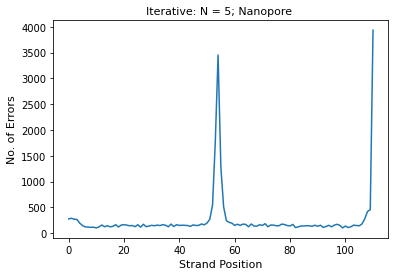

In [19]:
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Iterative: N = 5; Nanopore ', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()

In [20]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[26, 14, 14, 8, 4, 4, 4, 0, 4, 0, 8, 8, 4, 8, 6, 6, 0, 8, 6, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 8, 4, 0, 4, 0, 4, 2, 8, 4, 6, 6, 6, 6, 4, 2, 6, 2, 8, 4, 4, 6, 18, 84, 308, 454, 78, 30, 8, 8, 2, 6, 8, 0, 4, 0, 2, 2, 2, 0, 6, 4, 6, 8, 4, 6, 2, 0, 2, 4, 8, 6, 6, 4, 6, 4, 0, 4, 0, 0, 0, 4, 2, 8, 4, 4, 6, 10, 2, 0, 4, 2, 2, 2, 4, 2, 0, 4, 4, 2, 8, 16]


In [21]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


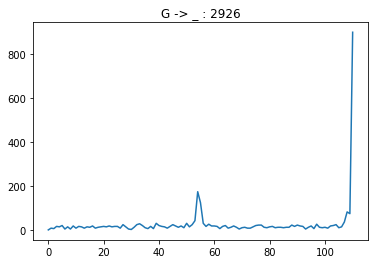

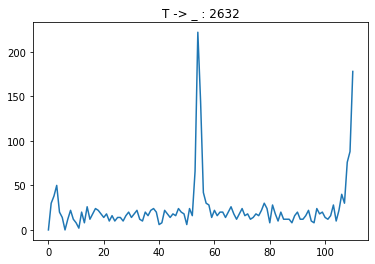

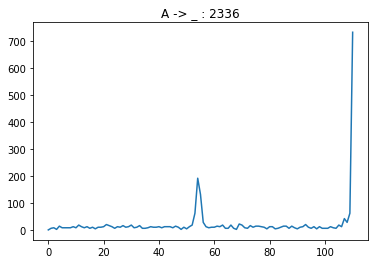

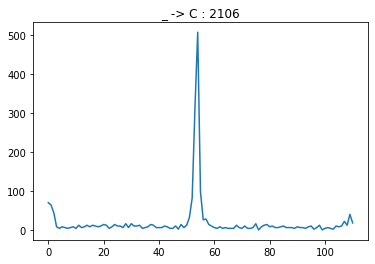

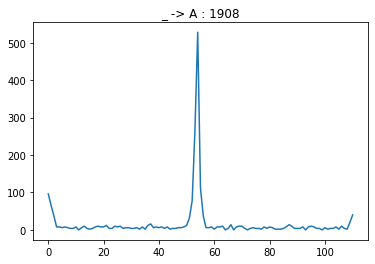

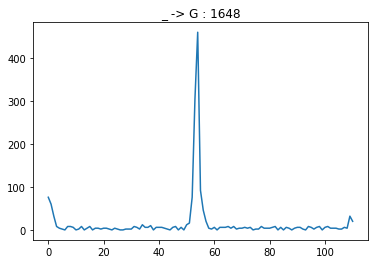

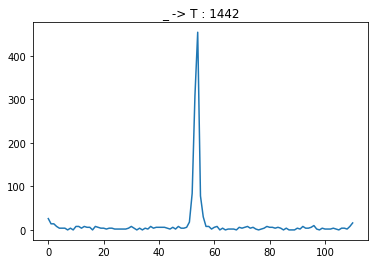

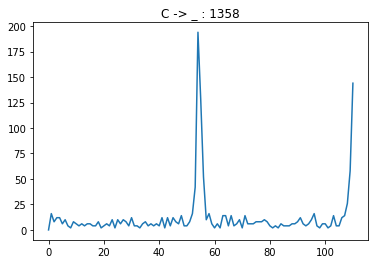

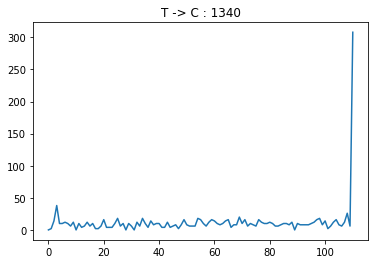

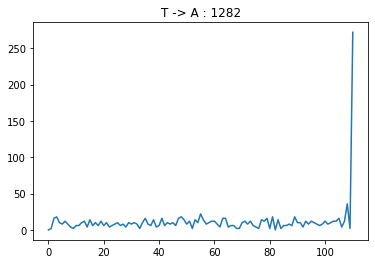

In [22]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [23]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)